# Image Database

In [2]:
# import librearies 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import random 
import os
pd.set_option('display.max_columns', None)
import math
from pandas import json_normalize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import urllib
import requests
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt 
from PIL import Image, ImageFilter  
from pylab import *
import cv2


In [3]:
pokemon_data = pd.read_csv('dataset/pokemon_final.csv')
pokemon_data.drop(columns='Unnamed: 0',inplace=True)
#  Modify fight to have it the same way as the against column
pokemon_data['Base_type'].replace('Fighting','Fight',inplace=True)
pokemon_data['Secondary_type'].replace('Fighting','Fight',inplace=True)

In [ ]:
# Read the photos and only keep the first one for each pokemon in another folder
for dirname, _, filenames in os.walk('archive (5)'):
    for filename in filenames:
        if filename == '0.jpg':
            shutil.copyfile(dirname+'/0.jpg',f'images_database/{dirname[19:]}.jpg')
            

KeyboardInterrupt: 

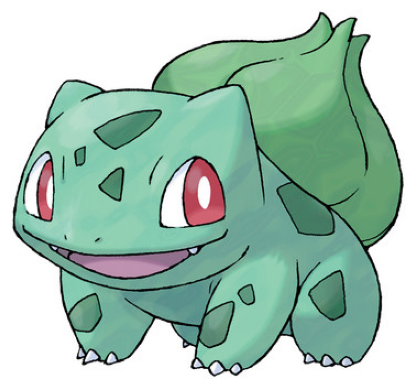

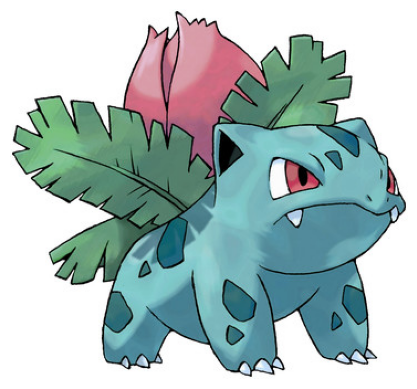

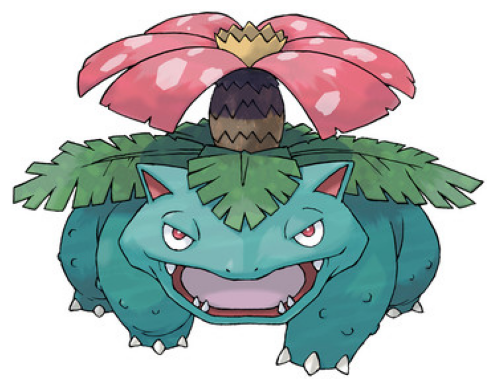

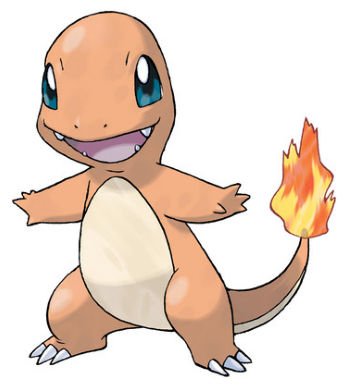

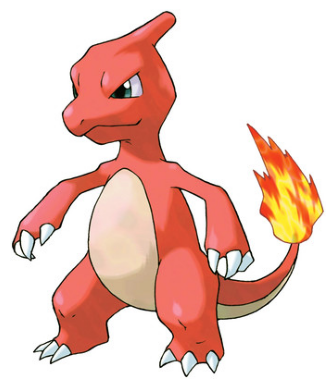

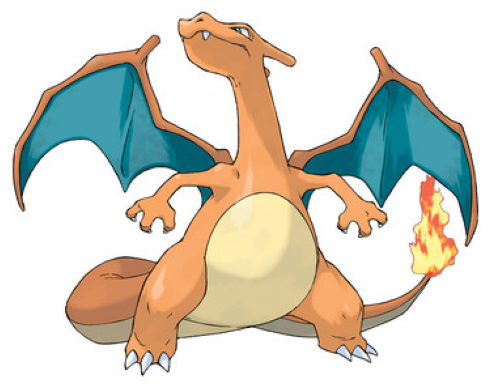

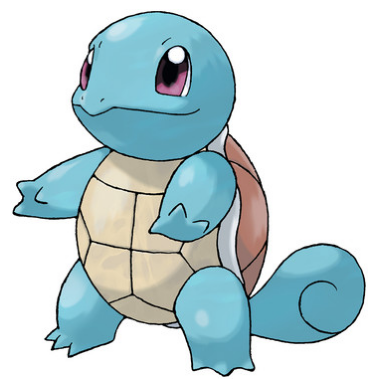

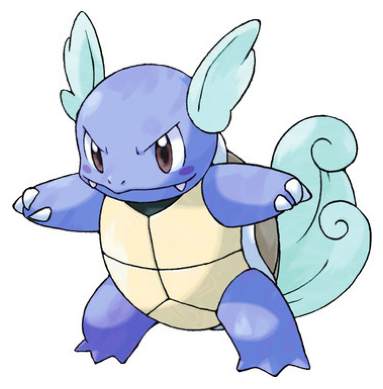

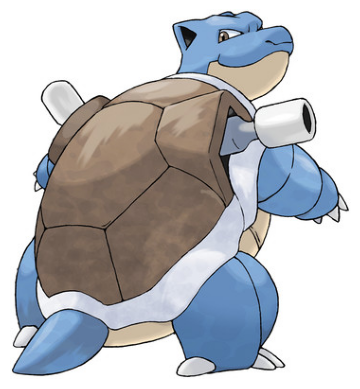

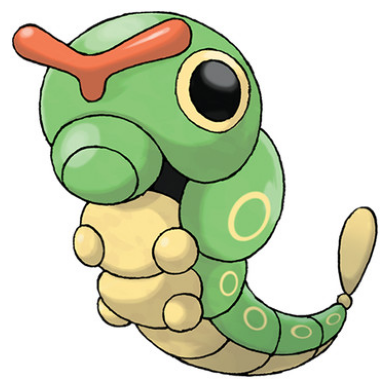

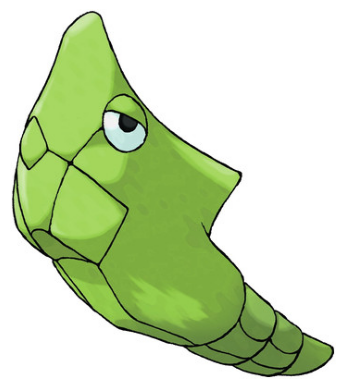

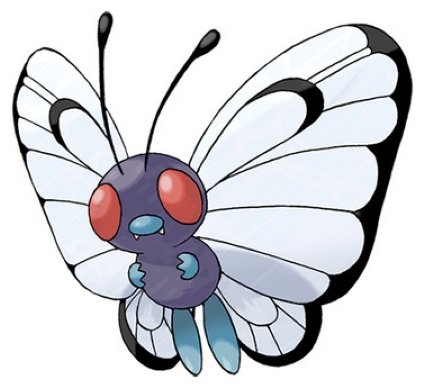

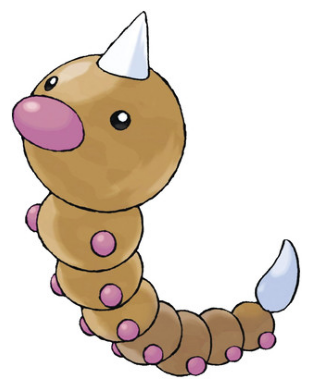

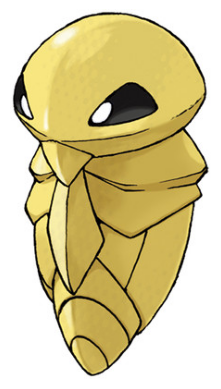

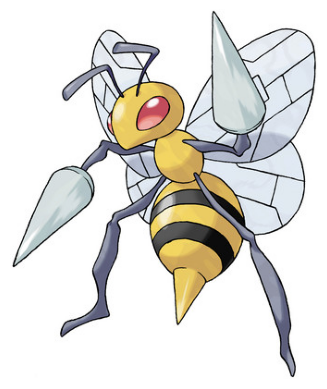

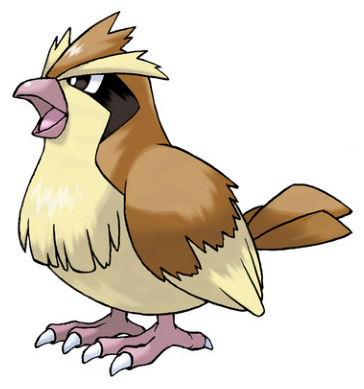

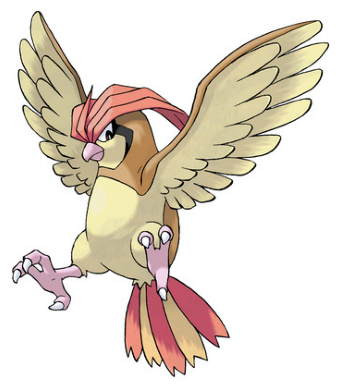

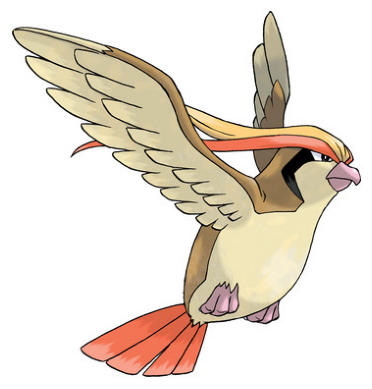

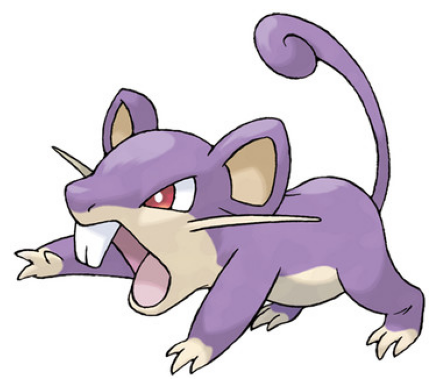

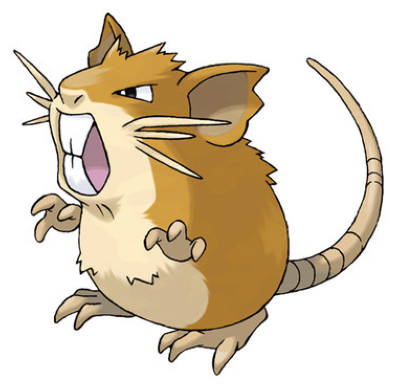

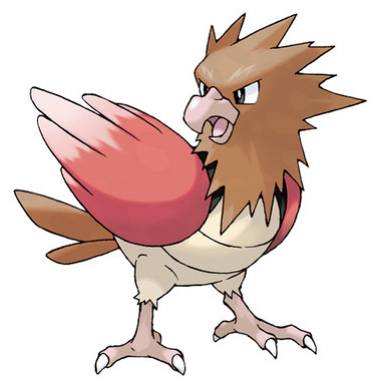

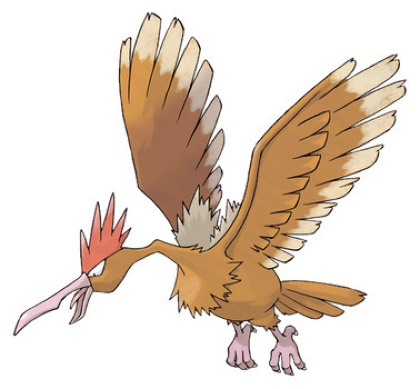

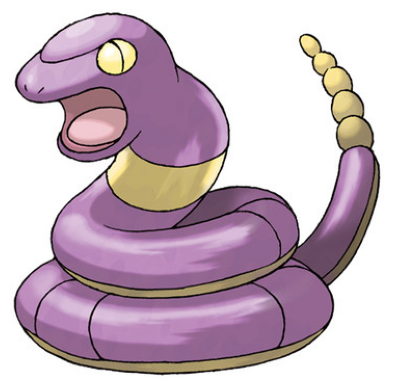

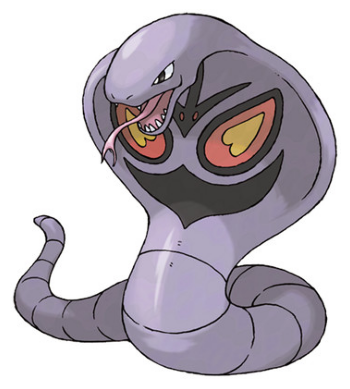

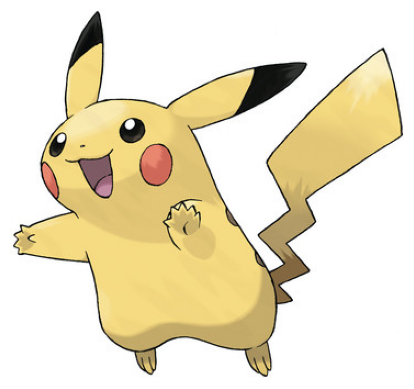

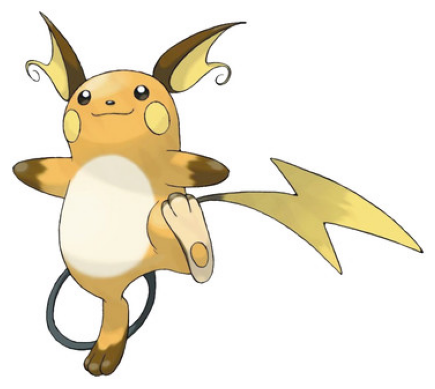

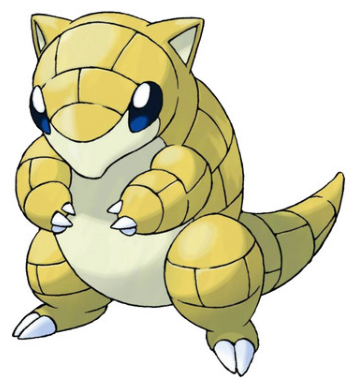

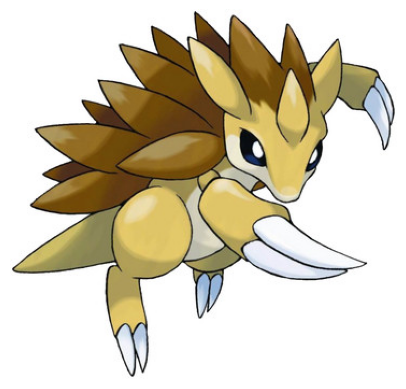

KeyboardInterrupt: 

In [ ]:
            
# Find and plot photos per name in the dataset
for dirname,_,filenames in os.walk('images_database'):
    for i in pokemon_data["Name"]:
        for filename in filenames:
             #We will use this in the battle simulation
             if i == filename[:-4]:
                img = mpimg.imread(f'{dirname}/{filename[:-4]}.jpg')
                imgplot = plt.imshow(img)
                plt.axis('off')
                plt.show()
             

In [4]:
image_folder = []
# Taking the photos that we have in order to compare with the no have list
for dirname,_,filenames in os.walk('images_database'):
    for filename in filenames:
            image_folder.append(filename[:-4])

In [5]:
len(image_folder)

1028

In [6]:
# Add a list of the photos we don't have
image_not_folder = []
for i in pokemon_data["Name"].sort_values():
    if i not in image_folder:
        image_not_folder.append(i)


In [7]:
print(len(image_folder))
len(image_not_folder)

1028


121

In [8]:
# Add a list of the photos we don't have
image_not_folder = []
for i in pokemon_data["Name"].sort_values():
    if i not in image_folder:
        image_not_folder.append(i)

# Scraping index, names and position of the pokemons we are missing

PATH=("C:\Program Files (x86)\chromedriver.exe")
driver=webdriver.Chrome(PATH)
driver.get("https://pokemondb.net/pokedex/all")
time.sleep(2)
indices = []
posicion = []
name = []
driver.find_element(By.XPATH, '//*[@id="pokedex"]/thead/tr/th[2]').click()
for i in range(1,1025):

    nombre = driver.find_element(By.XPATH,f'//*[@id="pokedex"]/tbody/tr[{i}]/td[2]/a').text
    
    
    if nombre in image_not_folder:
        indice = driver.find_element(By.XPATH,f'//*[@id="pokedex"]/tbody/tr[{i}]/td[1]/span').text
        indices.append(indice)
        name.append(nombre)
        print(nombre)
        posicion.append(i)
        print(indice)
        print(i)

driver.close()

Basculegion
0902
65
Basculegion
0902
66
Dudunsparce
0982
279
Dudunsparce
0982
280
Enamorus
0905
310
Enamorus
0905
311
Gimmighoul
0999
385
Gimmighoul
0999
386


KeyboardInterrupt: 

In [72]:
# Converting to int to loop later
indice_int = [int(i) for i in indices]
indice_int

[913,
 954,
 1021,
 953,
 966,
 1005,
 989,
 952,
 985,
 944,
 1013,
 911,
 988,
 928,
 903,
 918,
 906]

In [ ]:
#Checking lens
print(len(posicion))
print(len(indice_int))
len(name)

17
17


17

In [ ]:
#Scrap of the missing photos

PATH=("C:\Program Files (x86)\chromedriver.exe")
driver=webdriver.Chrome(PATH)
driver.get("https://pokemondb.net/pokedex/all")

src = []

driver.find_element(By.XPATH,'//*[@id="pokedex"]/thead/tr/th[2]/div').click()
for i,z,t in zip(posicion,indice_int,name):
    driver.find_element(By.XPATH,f'//*[@id="pokedex"]/tbody/tr[{i}]/td[2]/a').click()
    time.sleep(1)
    #XPATH can be different, we try and except in order to catch the different PATHS
    try:
        imagen = driver.find_element(By.XPATH,f'//*[@id="tab-basic-{z}"]/div[1]/div[1]/p/a/picture/img')
        imagen = imagen.get_attribute("src")
        #Download the image
        img_name = f'{t}.jpg'
        img_path = os.path.join('images_database', img_name)
        response = requests.get(imagen, stream=True)
        with open(img_path, 'wb') as file:
                for chunk in response.iter_content(chunk_size=1024):
                    if chunk:
                        file.write(chunk)
        print(f"Image {z} downloaded successfully")
    
    except:
        imagen=driver.find_element(By.XPATH,f'//*[@id="tab-basic-{z}"]/div[1]/div[1]/p/img')
        imagen = imagen.get_attribute("src")
        #Download the image
        img_name = f'{t}.jpg'
        img_path = os.path.join('images_database', img_name)
        response = requests.get(imagen, stream=True)
        with open(img_path, 'wb') as file:
                for chunk in response.iter_content(chunk_size=1024):
                    if chunk:
                        file.write(chunk)
        print(f"Image {z} downloaded successfully")

        
    #Try to add the photo
    try:

        src.append(imagen)
        print('Imagen metida')
        driver.back()
    except:
        print('Imagen no metida')
        driver.back()
    time.sleep(1)

driver.close()

Image 913 downloaded successfully
Imagen metida
Image 954 downloaded successfully
Imagen metida
Image 1021 downloaded successfully
Imagen metida
Image 953 downloaded successfully
Imagen metida
Image 966 downloaded successfully
Imagen metida
Image 1005 downloaded successfully
Imagen metida
Image 989 downloaded successfully
Imagen metida
Image 952 downloaded successfully
Imagen metida
Image 985 downloaded successfully
Imagen metida
Image 944 downloaded successfully
Imagen metida
Image 1013 downloaded successfully
Imagen metida
Image 911 downloaded successfully
Imagen metida
Image 988 downloaded successfully
Imagen metida
Image 928 downloaded successfully
Imagen metida
Image 903 downloaded successfully
Imagen metida
Image 918 downloaded successfully
Imagen metida
Image 906 downloaded successfully
Imagen metida


In [13]:
image_folder = []
# Re checking
for dirname,_,filenames in os.walk('images_database'):
    for filename in filenames:
            image_folder.append(filename[:-4])

len(image_folder)



1028

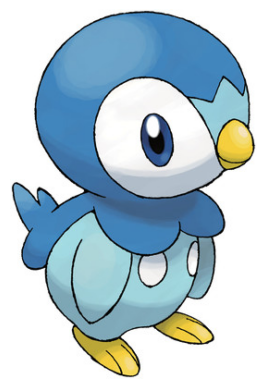

In [13]:
pokemon_1 = input('Display pokemon 1').lower().capitalize()
pokemon_2 = input('Display pokemon 2').lower().capitalize()

pokemon_mask=np.array((Image.open(f"images_database\{pokemon_1}.jpg")))
plt.imshow(pokemon_mask, interpolation="bilinear")
pokemon_mask_2=np.array((Image.open(f"images_database\{pokemon_2}.jpg")))
plt.imshow(pokemon_mask_2, interpolation="bilinear")
plt.axis('off')
plt.show()

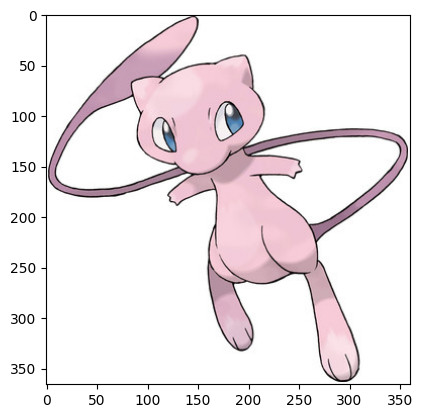

In [8]:
#Example
pokemon_mask=np.array((Image.open("images_database\Mew.jpg")))
plt.imshow(pokemon_mask, interpolation="bilinear")

In [ ]:
#Para loopear
pokemon_mask=np.array(Image.open(f"images_database\{image_folder}.jpg")) 

In [4]:
texto = "Pokemon?"

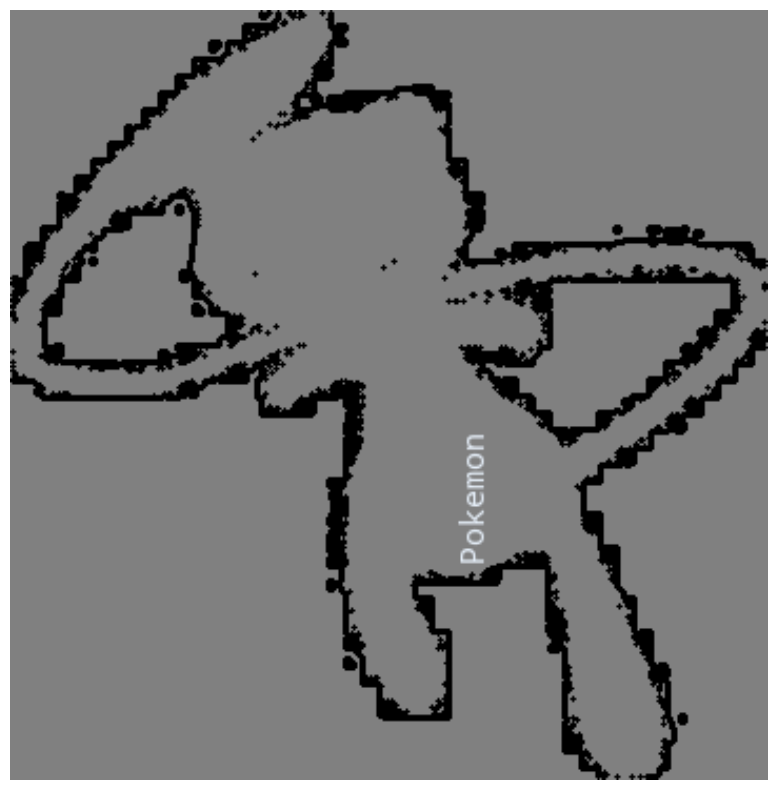

In [ ]:
# Word cloud example- not gonna use it
wordcloud=WordCloud(width=900, height=500, max_words=1000, mask=pokemon_mask, background_color="gray", colormap="Blues", contour_color="Black", contour_width=3,min_font_size=15,max_font_size=15).generate(texto)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
#plt.imshow(pokemon_mask,cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

In [1]:
import plotly as pl

In [ ]:
choice = random.choice(image_folder)
image_path = f"images_database\{choice}.jpg"
original_image = Image.open(image_path)

# Convert the image to grayscale
bw_image = original_image.convert("L")

# Set a threshold to make non-black pixels white
threshold_black = 100
black_and_white_image = bw_image.point(lambda x: 255 if x > threshold_black else 0)

# Set a threshold for "almost black" pixels to make them pure black
threshold_white = 240  # Adjust this value based on your image
final_image = black_and_white_image.point(lambda x: 0 if x > threshold_white else 255)
final_image.resize((500,500))
attempt = 0

# 4 attempts, in each attemp the blurr of the image will be reduced in order to guess the pokemon. If the guess is not right at the fourth attempt the script will show the pokemon
for i in range(3):
    if attempt == 0:
        print('Cual es este pokemon?')
        
        #Blurring the image
        final_image_0 = final_image.filter(ImageFilter.GaussianBlur(10))       
        
        final_image_0.show()
        respuesta = input('Cual es este pokemon?')

        if respuesta.lower().capitalize() in image_path:
            print(f'Has acertado en {attempt} intentos!')
            original_image.show()
            break
        else:
            print('No! Has fallado')
            attempt+=1

    elif attempt == 1:

        print('Cual es este pokemon?')
        print('attemp 1')
        #Blurring the image
        final_image_1 = final_image.filter(ImageFilter.GaussianBlur(5))       
        
        final_image_1.show()
        respuesta = input('Cual es este pokemon?')

        if respuesta.lower().capitalize() in image_path:
            print(f'Has acertado en {attempt} intentos!')
            original_image.show()
            break
        else:
            print('No! Has fallado')
            attempt+=1  

    elif attempt == 2:
        print('Cual es este pokemon?')
        print('attemp 2')
        #Blurring the image
        final_image_2 = final_image.filter(ImageFilter.GaussianBlur(2))       
        
        final_image_2.show()
        respuesta = input('Cual es este pokemon?')

        if respuesta.lower().capitalize() in image_path:
            print(f'Has acertado en {attempt} intentos!')
            original_image.show()
            break
        else:
            print('No! Has fallado')
            attempt+=1


print(f'Es {choice}!')
original_image.show()


Cual es este pokemon?
Cual es este pokemon?
attemp 1
Cual es este pokemon?
attemp 2
Es Blissey!


In [ ]:
#pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 840.2 kB/s eta 0:00:47
    --------------------------------------- 0.5/39.5 MB 840.2 kB/s eta 0:00:47
    --------------------------------------- 0.8/39.5 MB 730.2 kB/s eta 0:00:54
    --------------------------------------- 0.8/39.5 MB 730.2 kB/s eta 0:00:54
   - -------------------------------------- 1.0/39.5 MB 774.8 kB/s eta 0:00:50
   - -------------------------------------- 1.3/39.5 MB 780.8 kB/s eta 0:00:49
   - -------------------------------------- 1.3/39.5 MB 780.8 kB/s eta 0:00:49
   - -------------------------------------- 1.6/39.5 MB 762.9 kB/s eta 0:00:50
   - -------------------------------------- 1.6/39.5 MB 762.9 kB/s eta 0:00:50
   - -------------------------------------- 1.8/39.5 MB 756.9 kB/s eta 0:00:50


In [5]:
import random

In [22]:
import PIL.ImageColor
import PIL.ImageOps

choice = random.choice(image_folder)
choice = choice.lower().capitalize()
image_path = f"images_database\{choice}.jpg"
original_image = Image.open(image_path)

# Convert the image to grayscale
bw_image = original_image.convert("L")

# Set a threshold to make non-black pixels white
threshold_black = 250
black_and_white_image = bw_image.point(lambda x: 255 if x > threshold_black else 0)

# Set a threshold for "almost black" pixels to make them pure black
threshold_white = 50  # Adjust this value based on your image
final_image = black_and_white_image.point(lambda x: 0 if x > threshold_white else 255)
#contour(final_image, levels=[245], colors='black', origin='image')
final_image.resize((500,500))
inverted = PIL.ImageOps.invert(final_image)
inverted.filter(ImageFilter.GaussianBlur(10))
inverted.show()

#SUPERPONER LA FOTO DE CUAL ES ESTE POKEMON CON LA DEL POKEMON?

TypeError: float() argument must be a string or a real number, not 'QuadContourSet'

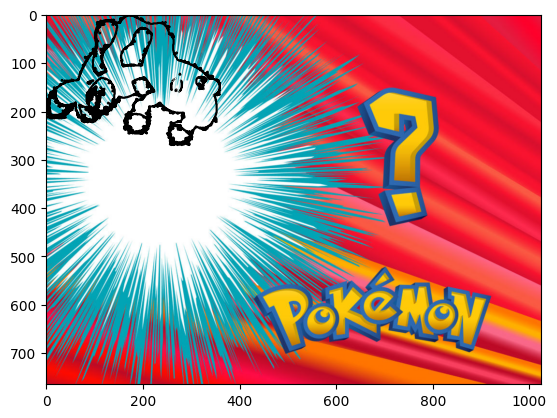

In [21]:
path_2 = 'imagenes\cual.jpg'
contorno=np.array(Image.open(f"{path_2}")) 
plt.imshow(contorno,interpolation="bilinear")
plt.fill(contour(inverted, levels=[245], colors='black', origin='image'))
plt.axis('off')

In [25]:
import playsound

In [26]:
playsound.playsound("Who is this pokemon")

FileNotFoundError: [Errno 2] No such file or directory: 'Who is this pokemon'